# Can the sentiment from YouTube comments resemble audience ratings?

This is a repurposed analysis of a final project made for a graduate-level Data Science class.

---

**PROJECT SUMMARY**

- This project aims to analyze how **audience ratings compare against the sentiment score of YouTube comments**, using superhero movies and one content creator's community as a point of reference.
- YouTube comments are only considered when they are within the top 50 most-voted and have a compound sentiment score of over .30 (on a -1 to 1 scale). Scores are then multiplied by 100 and redistributed to cover the full 0-100 range, **resulting in 258 user comments**. 
- **YouTube sentiment scores are mostly what is expected** - i.e., positive movies tend to have higher sentiment scores - although there are a few notable exceptions.
- Audience ratings are highly correlated among themselves, whereas **YouTube sentiments are moderately correlated to audience ratings** - with the exception of YouTube and TMDb, which are highly correlated and have a statistically significant relationship.
- Even though YouTube sentiment scores were moderately correlated to audience ratings, there are **several methodological limitations**.

---

In an age before the internet, the entertainment industry would rely on traditional metrics - such as box office performance - and manual methods - such as audience surveys - to gather information on a show or film's performance.

Then, in the early days of the internet, came along brands such as the Internet Movie Database (IMDb) or Rotten Tomatoes, which started aggregating reviews and granting scores for media creations. 

But as the internet evolved, so did social media platforms such as Facebook. This meant being able to access more reviews at a quicker pace - but this information comes with the major caveat of being messy. Dealing with user-generated data makes it harder for people to understand what others are saying about a show or movie.

In this regard, this article explores **how the sentiment score of YouTube comments compares against audience ratings**, using superheros movies (along with their respective audience ratings and YouTube sentiments) as a point of reference.

The project is divided as follows:
1. Methodology - what data is used and how is it preprocessed?
2. Exploratory Analysis - how does the data look like?
3. Statistical Analysis - are there relevant trends or relationships?
4. Conclusions - what does it all mean and what are the next steps?

---

# Methodology

This research process was iterative and nuanced - therefore, all data wrangling and analysis steps will be described upcoming in this section.

A graphic has been included to facilitate the explanation, but you can also refer to the expandable section below or the Jupyter Notebook (Python programming language script) if you'd like a deeper look into the methodology.

## What Data Is Used - Superhero Movies

This project will use **several superhero movies** as a point of comparison. This is done in order to use similar genres, therefore reducing the likelihood of results being due to chance alone. 

Additionally, half of the movies in the sample were (arguably) positively received, while the other half were poorly rated (or, at the very least, got mixed reviews). The superhero movies compared are:
- Spider-Man: No Way Home (2021) - positive reception
- Logan (2017) - positive reception
- Thor: Ragnarok (2017) - positive reception
- Guardians of the Galaxy (2014) - positive reception
- Spider-Man 2 (2004) - positive reception
- Morbius (2022) - negative reception
- Dark Phoenix (2019) - negative reception
- Batman v Superman (2016) - negative reception
- Fantastic Four (2015) - negative reception
- Suicide Squad (2016) - negative reception

## What Data Is Used - YouTube Reviews

This project will mainly rely on comments made on YouTube reviews, i.e., when a content creator talks about a movie or TV show and users react to it. All YouTube reviews are issued by the same **content creator (Jeremy Jahns)** in order to reduce randomness across the sample.

## What Data Is Used - Audience Ratings

YouTube comments will be compared against **multiple audience scores**. Specifically, the audience scores employed are:
- Metacritic's Metascore
- Rotten Tomatoes' Tomatometer
- The Movie Database's (TMDB's) User Score
- The Internet Movie Database's (IMDB's) Rating

Each audience rating can slightly vary in its methodology. For example, the Metascore and Tomatometer have critic ratings while the TMDB and IMDB ratings are average viewers. All ratings can change over time as they receive more scores, but it is expected for them to stay relatively stable after a movie's initial release.

## How Data Is Downloaded and Preprocessed - Audience Scores

All data is downloaded and wrangled using the programming language Python.

The Movie Database's (TMDB's) Application Programming Interface (API) is used to access TMDB ratings, while the Open Movie Database's (OMDB's) API is used to access Rotten Tomatoes, IMDb, and Metacritic scores. Both sources allow users to generate API keys and download this data freely.

Additional wrangling is performed on each source so that each row corresponds to a different movie and each column contains their respective scores.

## How Data Is Downloaded and Preprocessed - YouTube Comments

The library `youtube-comment-downloader` by Egbert Bouman is used to download YouTube comments along with the number of votes each receives and whether they are main comments or replies/threads.

From there, the data cleansing is a crucial step as the steps taken are meant to resemble how the author of this project would usually review comments: replies and threads are ignored and only the top 50 comments in terms of likes are taken into account.

The above-mentioned criteria emulates personal heuristics when assessing movie reviews. It is a method that has been of personal use and is arbitrary, so can, therefore, be further refined.

Lastly, all movies will have an IMDb ID and movie name - the ID will enable comparing YouTube comments against audience ratings in the next steps and the movie name is purely for readability purposes.

## How Data Is Analyzed - YouTube Sentiments

The Valence Aware Dictionary and sEntiment Reasoner (`VADER`) model within the Natural Language Toolkit library (`nltk`) is used to create a sentiment score for each comment. The VADER model is a rule-based dictionary and is optimized for social media data.

The VADER model yields four types of sentiments - negative, neutral, positive, and compound (an aggregation of the previous three). **This analysis relies on compound sentiments that are above .30** as the model is not sensitive to sarcasm and, therefore, tends to yield false negatives. Scores are then multiplied by 100 for better readability.

After applying the >.30 filter and multiplying scores by 100, they will follow **some rules to be redistributed and cover the full 0-100 range**: Scores below 61 will have 35 points deducted, scores between 61 and 64 will have 20 points deducted, scores between 64 and 68 will be left as is, and scores over 68 will have 15 points added.

It is also worth noting that the comments were not cleaned (e.g., emojis were not removed) and a few other sentiment analysis models (such as TextBlob) were explored.


## How Data Is Analyzed - YouTube Sentiments Vs. Audience Ratings

Spearman correlation is used to analyze the data given that the audience ratings and YouTube sentiments do not tend to follow a normal distribution (rather, it tends to be bimodal). Additionally, it is expected that scores are monotonic rather than being tied, which is why Spearman correlation is preferred over Kendall's tau.

---

# Exploratory Analysis

Once the methodological nuances are out of the way, let's dive into the actual data.

## How Does The Data Look Like? - Raw YouTube Comments and Sentiments

Below is a snippet of the resulting dataframe after downloading the comments, running the sentiment analysis model, and filtering for only desired comments (top-voted and with a sentiment score of over .30).

In [1]:
### SET UP

import pandas as pd # data wrangling
import numpy as np # linear algebra
import matplotlib.pyplot as plt # basic data visualization
import seaborn as sns # advanced data visualization
from youtube_comment_downloader import * # download comments on YouTube videos
import string # remove punctuation
from nltk.corpus import stopwords # text preprocessing
from nltk.tokenize import word_tokenize # text preprocessing
from nltk.tokenize import TweetTokenizer # text preprocessing
import nltk # sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analysis
from tmdbv3api import TMDb, Movie # the movie database scores
import requests # open movie database scores
from scipy.stats import pearsonr, spearmanr # correlation calculations
from tabulate import tabulate # add correlation results to table

nltk.download('vader_lexicon') # sentiment analysis
nltk.download('stopwords') # download stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macuriels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macuriels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df_comments = pd.read_csv('youtube_comments.csv')
df_comments.pop('Unnamed: 0')

df_comments

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,video_url,sentiment_vader_all,sentiment_vader,imdb_id,movie_name
0,Ugxy0EW0hAXkMITlCul4AaABAg,I liked how Tobey encouraged Andrew when he wa...,1 year ago (edited),@JCW7100,UCbvXnBx64gxlA1H4vDJzpbQ,16000.0,https://yt3.ggpht.com/ytc/APkrFKbrEzLfMW1O4gkA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.056, 'neu': 0.693, 'pos': 0.251, 'co...",0.8069,tt10872600,Spider Man No Way Home
1,UgwHvRvLbOPqvaekxD54AaABAg,I just hope that Andrew Garfield knows that ev...,1 year ago,@Memehuskie,UCh82u85qKmdJgi18eC6F1aw,7900.0,https://yt3.ggpht.com/R645Cum_zO5MssGz8sFrNSjA...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7650,tt10872600,Spider Man No Way Home
2,UgwtMgwyAET_fnp0RBJ4AaABAg,Willem Dafoe's face getting a bigger smile eve...,1 year ago,@Arcademan09,UC5-NgJBkshUiNP-LitAVKPQ,6900.0,https://yt3.ggpht.com/ytc/APkrFKbqUAKgyQu5TRzD...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.7430,tt10872600,Spider Man No Way Home
3,UgyMdnQwIk2DakHYD8V4AaABAg,They made what didn't work in The Amazing Spid...,1 year ago,@hunterkiller1440,UC30IjiHQ4YOKSjA-aI5lhhQ,5500.0,https://yt3.ggpht.com/ytc/APkrFKYWHR6YG51PTIy2...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.8767,tt10872600,Spider Man No Way Home
4,UgwLlPNVbPZYiim55Ut4AaABAg,Andrew Garfield really shined in this movie. T...,1 year ago,@amitnagpal1985,UC8_aUc9vnTE_uehi8IbYMjQ,4600.0,https://yt3.ggpht.com/ytc/APkrFKZjmZSSaX3mwGnc...,False,False,1.667748e+09,https://www.youtube.com/watch?v=4gyYWO5EYqs,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.9246,tt10872600,Spider Man No Way Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,UggNeBuLtLrSiHgCoAEC,Marvel just won this fight with Daredevil,7 years ago,@29kangka,UCJIhTFewiYLWaZgtgpIzXOw,195.0,https://yt3.ggpht.com/ytc/APkrFKbP-jZIYqxkfB0o...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.214, 'neu': 0.214, 'pos': 0.571, 'co...",0.6124,tt2975590,Batman v Superman
254,Ugh1AiUXUQFVd3gCoAEC,I trust you on this. Will go see it drunk. Bet...,7 years ago,@baronsengir187,UCToYzT7u7oHNESRDOfVNiqQ,172.0,https://yt3.ggpht.com/ytc/APkrFKbecf4z9arSymv3...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.136, 'neu': 0.511, 'pos': 0.352, 'co...",0.5859,tt2975590,Batman v Superman
255,UgjebgAnb9EDwngCoAEC,"Good fucking job, WB and Zack Snyder. You have...",7 years ago,@brandonmumek1282,UCtyHvTPP_9049gkHRRgDKmw,168.0,https://yt3.ggpht.com/ytc/APkrFKaoexjTEW-uJQ8-...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.073, 'neu': 0.66, 'pos': 0.267, 'com...",0.7096,tt2975590,Batman v Superman
256,Ugg-qlYwMoU6JngCoAEC,tbh I liked this more than age of ultron,7 years ago,@Hoodie47,UCiFMVnPlZDfTXScq326QO8w,163.0,https://yt3.ggpht.com/DkRuA-uEC14ItP_ID4c1Pvcg...,False,False,1.478447e+09,https://www.youtube.com/watch?v=aC4rt7K8fPY,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,tt2975590,Batman v Superman


This results in a dataframe with 258 comments. Besides the compound sentiment column (`sentiment_vader`), there are some other data points worth highlighting, such as the number of votes each comment receives, whether it is a main comment or a reply, and the actual text that was written.

## How Does The Data Look Like? - Average YouTube Sentiment Score

Once the raw comments have been analyzed and filtered, comes calculating the average sentiment score per movie (**raw average before redistributing**). Below is the result of said transformation.

In [14]:
df_sentiment = pd.read_csv('youtube_sentiments.csv')
df_sentiment.pop('Unnamed: 0')

df_sentiment

,imdb_id,movie_name,sentiment_vader
0,tt0316654,Spider Man 2 2004,0.773097
1,tt10872600,Spider Man No Way Home,0.704438
2,tt1386697,Suicide Squad,0.638520
3,tt1502712,Fantastic Four 2015,0.589008
4,tt2015381,Guardians of the Galaxy,0.784280
5,tt2975590,Batman v Superman,0.608745
6,tt3315342,Logan,0.646065
7,tt3501632,Thor Ragnarok,0.658208
8,tt5108870,Morbius,0.661288
9,tt6565702,Dark Phoenix,0.566129


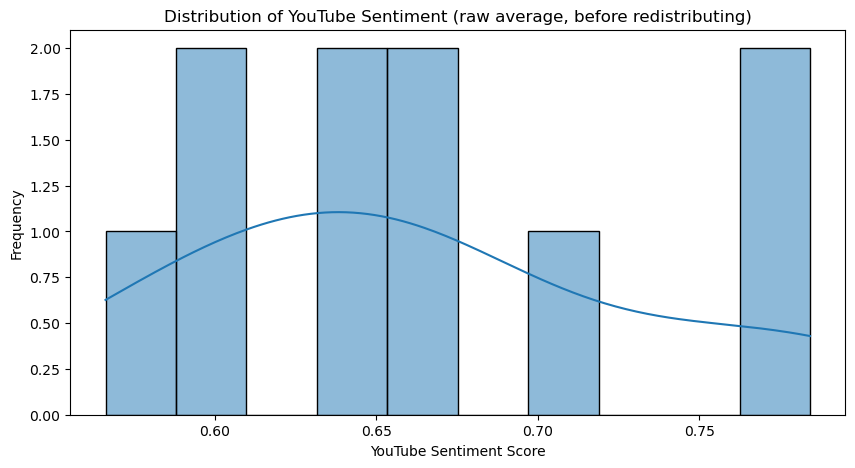

In [15]:
# Create a histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sentiment, x='sentiment_vader', bins=10, kde=True)
plt.title('Distribution of YouTube Sentiment (raw average, before redistributing)')
plt.xlabel('YouTube Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The resulting scores oscilate between 0.6 and 0.8, despite scores being able to be as low as 0.3.

Setting aside that fact, the results are mostly what is expected, especially in terms of ranking - although there are some notable outliers. 

For example, the Morbius (2022) movie was negatively received, yet scored above Logan, which is among the most praised superhero movies of all-time.

## How Does The Data Look Like? - Redistributed YouTube Sentiments vs. Audience Ratings

Even though a correlation analysis can already be run based on ranking, the scores will be multiplied and redistributed to increase readability and cover the full 0-100 range.

As explained in the methodology section, the redistribution scoring logic goes as follows: Scores below 61 will have 35 points deducted, scores between 61 and 64 will have 20 points deducted, scores between 64 and 68 will be left as is, and scores over 68 will have 15 points added.

After redistributing YouTube sentiments - and comparing them against audience ratings - this is what we get.

In [16]:
df_merged = pd.read_csv('youtube_vs_others.csv')
df_merged.pop('Unnamed: 0')

df_merged

,movie_name,imdb_id,TMDb Rating,Metascore,Rotten Tomatoes,imdbRating,YouTube Sentiment
0,Spider Man 2 2004,tt0316654,7.269,83.0,9.3,7.5,92.309750
1,Spider Man No Way Home,tt10872600,7.972,71.0,9.3,8.2,85.443784
2,Suicide Squad,tt1386697,5.911,40.0,2.6,5.9,43.852000
3,Fantastic Four 2015,tt1502712,4.400,27.0,0.9,4.3,23.900800
4,Guardians of the Galaxy,tt2015381,7.976,76.0,9.2,8.0,93.428000
5,Batman v Superman,tt2975590,5.965,44.0,2.9,6.5,25.874500
6,Logan,tt3315342,7.819,77.0,9.3,8.1,64.606500
7,Thor Ragnarok,tt3501632,7.600,74.0,9.3,7.9,65.820833
8,Morbius,tt5108870,6.056,35.0,1.5,5.2,66.128788
9,Dark Phoenix,tt6565702,5.981,43.0,2.2,5.7,21.612857


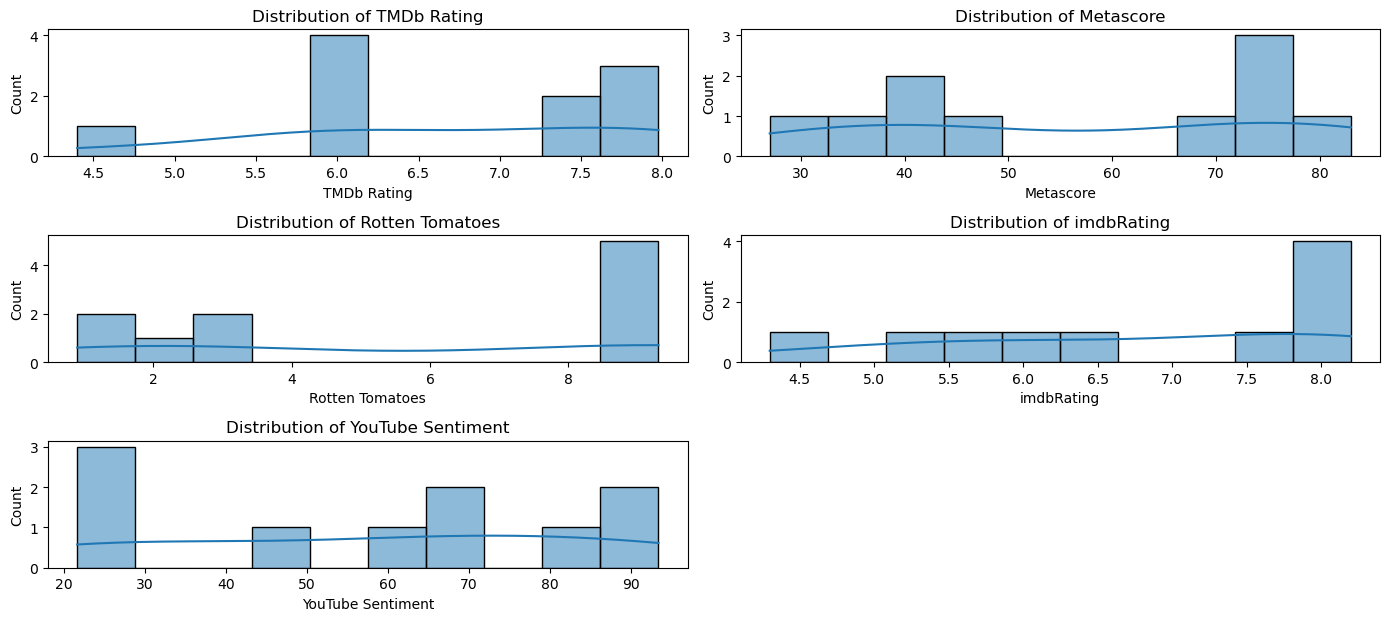

In [17]:
# Define the columns you want to plot
columns_to_plot = df_merged[[
    'TMDb Rating'
    , 'Metascore'
    , 'Rotten Tomatoes'
    , 'imdbRating'
    , 'YouTube Sentiment']]

# Set the number of columns in the grid
num_cols = 2  # You can adjust this to your preference
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of distribution plots
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_merged[column], kde=True, bins=10)  # You can choose different plot types (e.g., kde=False for histograms)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

The redistributing of YouTube sentiments polarized the scores, making them be either low, mid, or high - and this trend more or less mirrors the audience rating's distributions.

Metascore and Rotten Tomatoes are the ones with the most polarized scores, which is an interesting phenomena given that those two systems include more movie critics. TMDb and IMDb, on the other hand, are closer to an average viewer's perspective, and this format allows for mid-level scores (which is also what happens with YouTube comments).

---

# Statistical Analysis

At this point, we have already observed some interesting trends - but let's see what a formal statistical analysis has to say on the matter.

As explained in the methodology section, Spearman correlation is an apt fit for this case given that the scores do not follow a strictly normal distribution. Additionally, it is unlikely for scores to be tied, which is why Spearman correlation is preferred over Kendall's tau.

Below are the correlation coefficients and their associated p-values.

In [18]:
# Calculating correlation matrix
correlation_matrix = df_merged.corr(method='spearman')

correlation_matrix

,TMDb Rating,Metascore,Rotten Tomatoes,imdbRating,YouTube Sentiment
TMDb Rating,1.000000,0.733333,0.731607,0.854545,0.769697
Metascore,0.733333,1.000000,0.894187,0.793939,0.600000
Rotten Tomatoes,0.731607,0.894187,1.000000,0.906693,0.569028
imdbRating,0.854545,0.793939,0.906693,1.000000,0.587879
YouTube Sentiment,0.769697,0.600000,0.569028,0.587879,1.000000


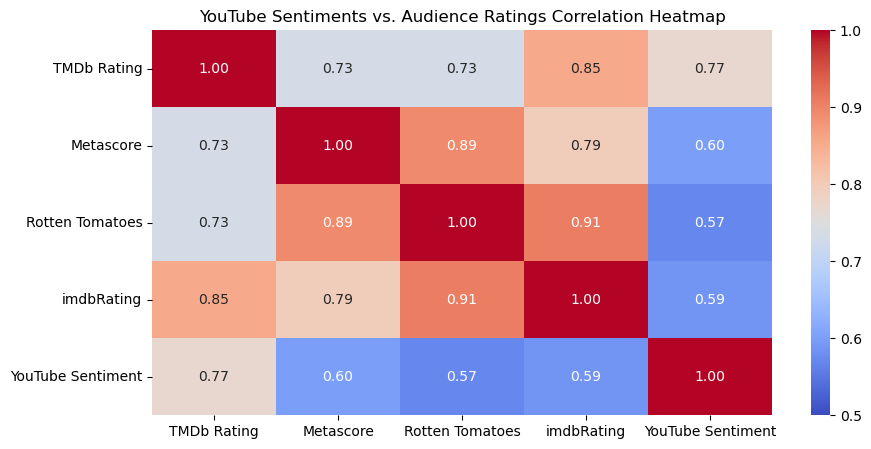

In [19]:
# Visualizing the correlation matrix
plt.figure(figsize=(10, 5))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, vmax=1)
plt.title("YouTube Sentiments vs. Audience Ratings Correlation Heatmap")
plt.show()

In [20]:
df_pvalues = df_merged[['TMDb Rating', 'Metascore', 'Rotten Tomatoes', 'imdbRating', 'YouTube Sentiment']]

# Calculate Spearman correlation coefficients and p-values
correlations = []
p_values = []

for column1 in df_pvalues.columns:
    for column2 in df_pvalues.columns:
        if column1 != column2:
            correlation, p_value = spearmanr(df_pvalues[column1], df_pvalues[column2])
            correlations.append([f'{column1} vs {column2}', correlation, p_value])

# Create a Pandas DataFrame for the table
table_df = pd.DataFrame(correlations, columns=['Rating Pair', 'Correlation Coefficient', 'P-Value'])

# Define a function to add asterisks
def add_asterisks(p_value, alpha=0.05):
    if p_value < 0.001:
        return f'{p_value:.4f}***'
    elif p_value < 0.01:
        return f'{p_value:.4f}**'
    elif p_value < alpha:
        return f'{p_value:.4f}*'
    else:
        return f'{p_value:.4f}'

# Add asterisks to the P-values column
table_df['P-Value'] = table_df['P-Value'].apply(add_asterisks)

# Display the table
table = tabulate(table_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤══════════════════════════════════════╤═══════════════════════════╤═══════════╕
│    │ Rating Pair                          │   Correlation Coefficient │ P-Value   │
╞════╪══════════════════════════════════════╪═══════════════════════════╪═══════════╡
│  0 │ TMDb Rating vs Metascore             │                  0.733333 │ 0.0158*   │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  1 │ TMDb Rating vs Rotten Tomatoes       │                  0.731607 │ 0.0162*   │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  2 │ TMDb Rating vs imdbRating            │                  0.854545 │ 0.0016**  │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  3 │ TMDb Rating vs YouTube Sentiment     │                  0.769697 │ 0.0092**  │
├────┼──────────────────────────────────────┼───────────────────────────┼───────────┤
│  4 │ Metascore vs TMDb Rating             │         

Starting with the audience scores, they are highly correlated among themselves. IMDb ratings seem to be the most representative as they have the highest correlation across all audience ratings, while the TMDb is the least correlated with other systems.

In terms of sentiment analysis, however, results are less desirable. All audience ratings are moderately-to-strongly correlated to the YouTube sentiment.

YouTube sentiments were most correlated to TMDb ratings, with this relationship being statistically significant.

---

# Conclusions

It is comes as no surprise to say that analyzing social media sentiments is a tricky affair. There are many projects and datasets that attempt to do so, even focusing on movie reviews.

Despite the fact that YouTube sentiments came out as moderately-to-highly correlated, the results are not quite what was expected, which could be due to many reasons.

First, YouTube sentiments, by their nature, differ from audience ratings. Comments on YouTube do not solely focus on stating opinions about a movie - they can also engage with the content creator, reply to comments made on the video, or simply offer comedy relief.

Additionally, this project implemented several cleaning steps, such as including only those with a certain sentiment threshold, to attempt to include comments which would most resemble a review. However, these heurestics are arbitrary and did not yield ideal results.

Future works could explore several ideas to yield more desireable results. It may be worth exploring even more rule-based libraries or implementing alternative steps such as including positive sentiments instead of compound. It can also be worth implementing rules to detect sarcasm or even using a supervised machine learning model.